## • **PART 1**
## • **DOMAIN:** Face recognition
## • **CONTEXT:** 
Company X intends to build a face identification model to recognise human faces.
## • **DATA DESCRIPTION:**
The dataset comprises of images and its mask where there is a human face.
## • **PROJECT OBJECTIVE:** 
Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.
## • **TASK:** 
In this problem, we use a pre-trained model trained on Face recognition to recognise similar faces. Here, we are particularly interested in recognising whether two given faces are of the same person or not. Below are the steps involved in the project.<br>
• Load the dataset and create the metadata.<br>
• Check some samples of metadata.<br>
• Load the pre-trained model and weights.<br>
• Generate Embedding vectors for each face in the dataset.<br>
• Build distance metrics for identifying the distance between two given images.<br>
• Use PCA for dimensionality reduction.<br>
• Build an SVM classifier to map each image to its right person.<br>
• Predict using the SVM model.<br>

## 1. Load the dataset and create the metadata.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/ACV Project 2 Dataset/Dataset Aligned Face Dataset from Pinterest.zip', 'r') as zip:
  zip.extractall()

In [ ]:
import numpy as np
import os

class IdentityMetadata():
  def __init__(self, base, name, file):
    self.base = base
    self.name = name
    self.file = file
  
  def __repr__(self):
    return self.image_path()
  
  def image_path(self):
    return os.path.join(self.base, self.name, self.file) 
  
def load_metadata(path):
  metadata = []
  for i in os.listdir(path):
    for f in os.listdir(os.path.join(path, i)):
      ext = os.path.splitext(f)[1]
      if ext == '.jpg' or ext == '.jpeg':
        metadata.append(IdentityMetadata(path, i, f))
  return np.array(metadata)

metadata = load_metadata('PINS')

In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

## 2. Check some samples of metadata.

In [ ]:
metadata.shape

(10770,)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


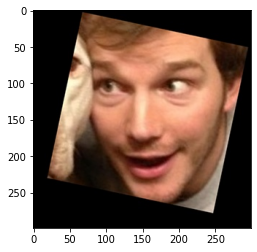

In [ ]:
import matplotlib.pyplot as plt

print(load_image(metadata[10].image_path()))
plt.imshow(load_image(metadata[10].image_path()))

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


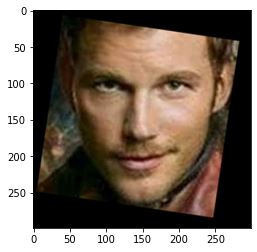

In [ ]:
import matplotlib.pyplot as plt

print(load_image(metadata[50].image_path()))
plt.imshow(load_image(metadata[50].image_path()))

## 3. Load the pre-trained model and weights.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
  model = Sequential()
  model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
  model.add(Convolution2D(64, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))
    
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(128, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))
  
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(256, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(256, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(256, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))
   
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))
  
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))
    
  model.add(Convolution2D(4096, (7, 7), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(4096, (1, 1), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(2622, (1, 1)))
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [ ]:
model = vgg_face()
model.load_weights('/content/drive/MyDrive/ACV Project 2 Dataset/vgg_face_weights.h5')

## 4. Generate Embedding vectors for each face in the dataset.

In [ ]:
from tensorflow.keras.models import Model

vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

img = load_image(metadata[0].image_path())
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(2622,)


In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
  try:
    img = load_image(m.image_path())
    img = cv2.resize(img, dsize = (224,224))
    img = (img / 255.).astype(np.float32)
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  except Exception as e:
    print(str(e))
    print(i,m)

## 5. Build distance metrics for identifying the distance between two given images.

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

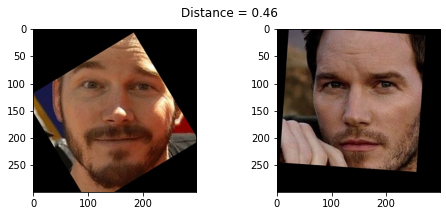

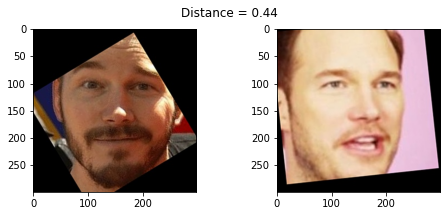

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(20, 21)
show_pair(20, 100)

## 6. Use PCA for dimensionality reduction.

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

In [ ]:
# encoding labels and standardizing features

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128, svd_solver='randomized', whiten=True)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## 7. Build an SVM classifier to map each image to its right person.

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', class_weight=None , C=10000000, gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print('Classifier score :', clf.score(X_test, y_test))

Classifier score : 0.9565580618212197


## 8. Predict using the SVM model.

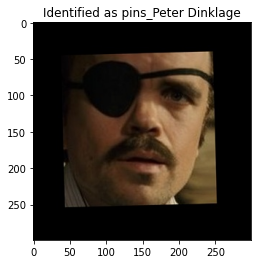

In [ ]:
import warnings
warnings.filterwarnings('ignore')

example_image = load_image(metadata[test_idx][50].image_path())
example_prediction = clf.predict([X_test[50]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

## Conclusion
* VGG model with pre-trained weights was used to generate embeddings for each images in the dataset.
* Since, there were 2,622 features for each image, PCA was used for dimension reduction after standardizing the features.
* With an cumulative explained variance of 95%, 347 PCA components were used.

## • **PART 2**
## • **DOMAIN:** State traffic department
## • **CONTEXT:**
City X’s traffic department wants to understand the traffic density on road during busy hours in order to efficiently program their traffic lights.
## • **TASK:**
Create an automation using computer vision to impute dynamic bounding boxes to locate cars or vehicles on the road. It would require for you to do some research on how to impute bounding boxes on video file. You can use video provided with this assignment or any video of your choice which has moving cars to impute bounding boxes.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import time

car_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/cars.xml')
capture = cv2.VideoCapture('/content/drive/MyDrive/video2.mp4')

while capture.isOpened():
  time.sleep(.05)
  ret, frame = capture.read()
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  cars = car_classifier.detectMultiScale(gray, 1.1, 2)
  for (x,y,w,h) in cars:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    cv2_imshow(frame)
  if cv2.waitKey(0) == 1:
    break
capture.release()
cv2.destroyAllWindows()

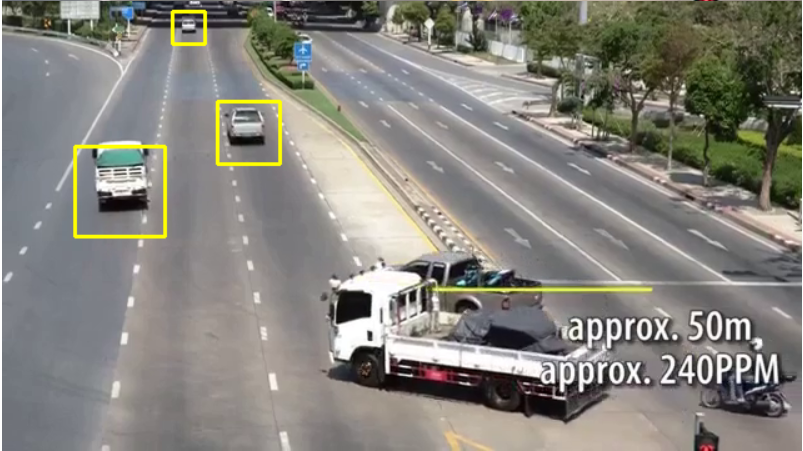

In [ ]:
cv2_imshow(cv2.imread('/content/drive/MyDrive/Capture.PNG'))

### As video can be only seen in real time colab notebook, i have attached a sample image of detected vehicles above.